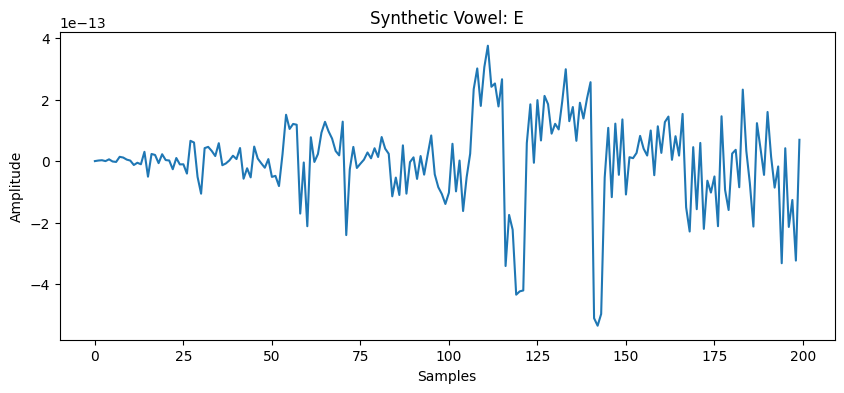

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io.wavfile import write

def generate_vowel(f1, f2, f3, duration=1.0, sampling_rate=16000):
    t = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)

    vowel_signal = 0.6 * np.sin(2 * np.pi * f1 * t) + \
                   0.3 * np.sin(2 * np.pi * f2 * t) + \
                   0.1 * np.sin(2 * np.pi * f3 * t)

    return vowel_signal

sampling_rate = 200
duration = 1.0

formants = {
    'e': (300, 2200, 3000)
}

vowel_signals = {vowel: generate_vowel(*f, duration, sampling_rate) for vowel, f in formants.items()}

for vowel, signal in vowel_signals.items():
    plt.figure(figsize=(10, 4))
    plt.plot(signal[:1000])
    plt.title(f'Synthetic Vowel: {vowel.upper()}')
    plt.xlabel('Samples')
    plt.ylabel('Amplitude')
    plt.show()

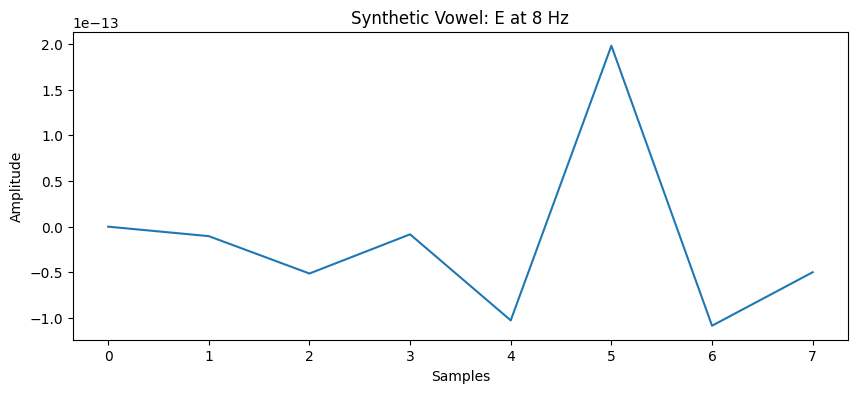

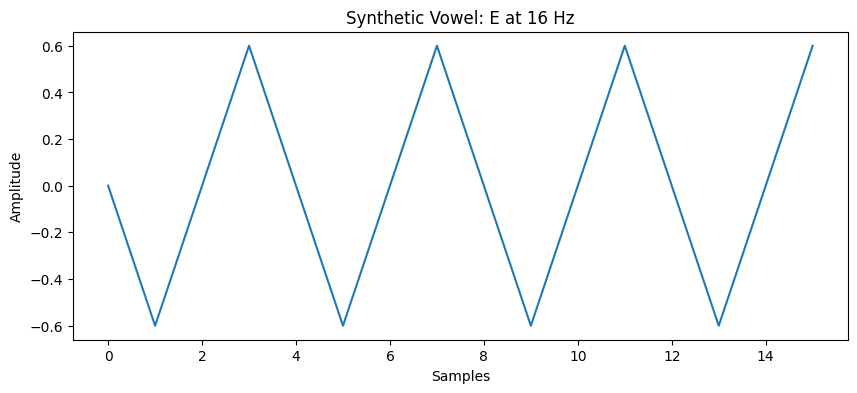

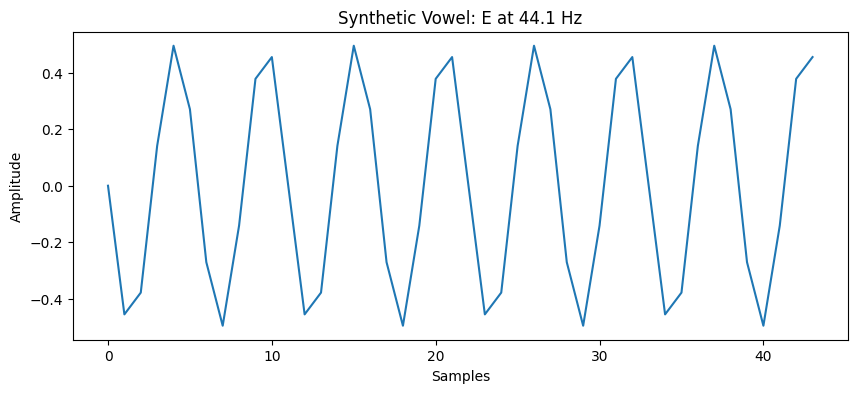

In [2]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.io.wavfile import write

sampling_rates = [8, 16, 44.1]
duration = 1.0

formants = {
    'e': (300, 2200, 3000)
}

for sampling_rate in sampling_rates:
  for vowel, f in formants.items():
      t = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)
      vowel_signal = 0.6 * np.sin(2 * np.pi * f[0] * t) + \
                     0.3 * np.sin(2 * np.pi * f[1] * t) + \
                     0.1 * np.sin(2 * np.pi * f[2] * t)

      plt.figure(figsize=(10, 4))
      plt.plot(vowel_signal[:1000])
      plt.title(f'Synthetic Vowel: {vowel.upper()} at {sampling_rate} Hz')
      plt.xlabel('Samples')
      plt.ylabel('Amplitude')
      plt.show()


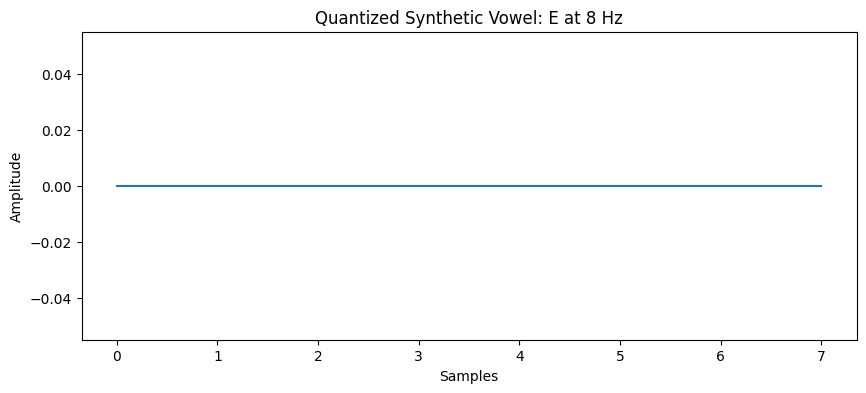

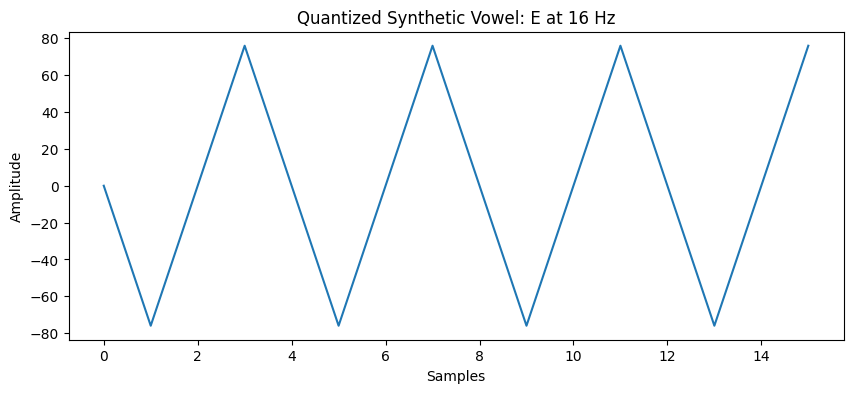

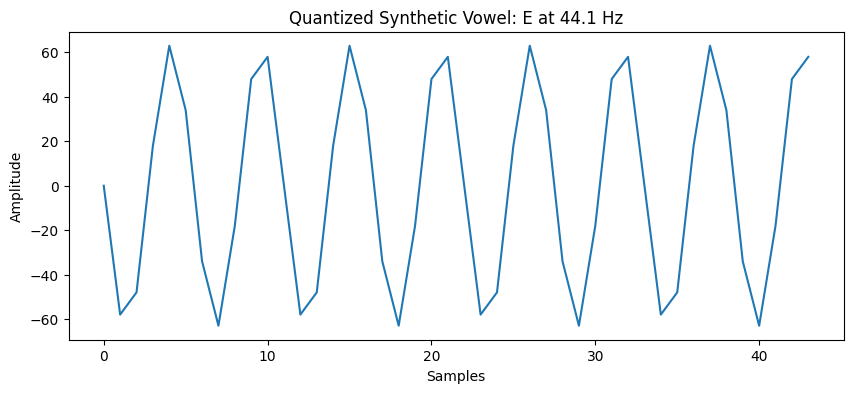

In [3]:

for sampling_rate in sampling_rates:
  for vowel, f in formants.items():
      t = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)
      vowel_signal = 0.6 * np.sin(2 * np.pi * f[0] * t) + \
                     0.3 * np.sin(2 * np.pi * f[1] * t) + \
                     0.1 * np.sin(2 * np.pi * f[2] * t)

      quantized_signal = np.round(vowel_signal * 127).astype(np.int16)

      plt.figure(figsize=(10, 4))
      plt.plot(quantized_signal[:1000])
      plt.title(f'Quantized Synthetic Vowel: {vowel.upper()} at {sampling_rate} Hz')
      plt.xlabel('Samples')
      plt.ylabel('Amplitude')
      plt.show()


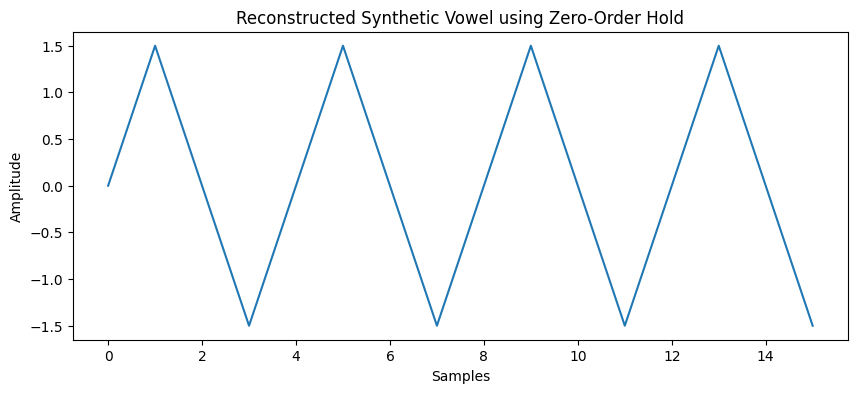

In [4]:

new_sampling_rate = 16
new_duration = duration
new_t = np.linspace(0, new_duration, int(new_sampling_rate * new_duration), endpoint=False)
reconstructed_signal_zero = np.interp(new_t, t, quantized_signal)

plt.figure(figsize=(10, 4))
plt.plot(reconstructed_signal_zero[:1000])
plt.title(f'Reconstructed Synthetic Vowel using Zero-Order Hold')
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.show()


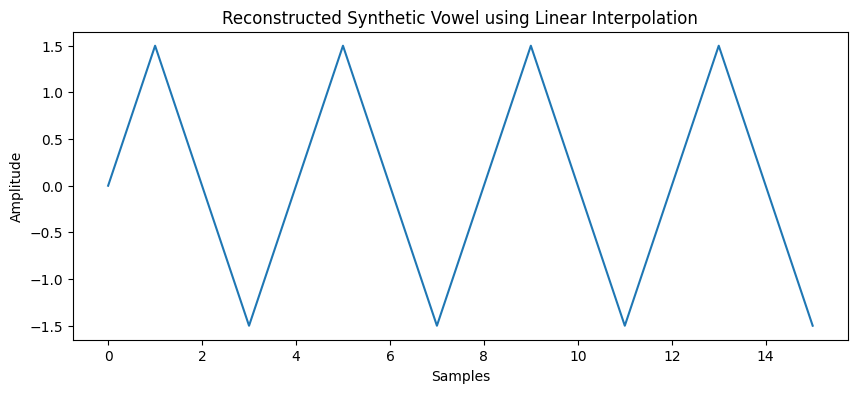

In [6]:

new_sampling_rate = 16
new_duration = duration
new_t = np.linspace(0, new_duration, int(new_sampling_rate * new_duration), endpoint=False)
reconstructed_signal = np.interp(new_t, t, quantized_signal)

plt.figure(figsize=(10, 4))
plt.plot(reconstructed_signal[:1000])
plt.title(f'Reconstructed Synthetic Vowel using Linear Interpolation')
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.show()


In [15]:
import numpy as np
import matplotlib.pyplot as plt

def generate_vowel(f1, f2, f3, duration=1.0, sampling_rate=16000):
    t = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)
    vowel_signal = 0.6 * np.sin(2 * np.pi * f1 * t) + \
                   0.3 * np.sin(2 * np.pi * f2 * t) + \
                   0.1 * np.sin(2 * np.pi * f3 * t)
    return t, vowel_signal

def quantize_signal(signal):
    return np.round(signal * 127).astype(np.int16)

def zero_order_hold(t, quantized_signal, new_sampling_rate, duration):
    new_t = np.linspace(0, duration, int(new_sampling_rate * duration), endpoint=False)
    reconstructed_signal = np.interp(new_t, t, quantized_signal)
    return new_t, reconstructed_signal

def linear_interpolation(t, quantized_signal, new_sampling_rate, duration):
    new_t = np.linspace(0, duration, int(new_sampling_rate * duration), endpoint=False)
    reconstructed_signal = np.interp(new_t, t, quantized_signal)
    return new_t, reconstructed_signal

def calculate_mse(original_signal, reconstructed_signal):
    original_resampled = np.interp(np.linspace(0, 1, len(reconstructed_signal)),
                                   np.linspace(0, 1, len(original_signal)),
                                   original_signal)
    mse = np.mean((original_resampled - reconstructed_signal) ** 2)
    return mse

def main():

    duration = 1.0
    original_sampling_rate = 200
    formants = {'e': (300, 2200, 3000)}

    t, original_signal = generate_vowel(*formants['e'], duration, original_sampling_rate)

    quantized_signal = quantize_signal(original_signal)

    new_sampling_rate = 16
    _, reconstructed_signal_zero = zero_order_hold(t, quantized_signal, new_sampling_rate, duration)

    _, reconstructed_signal_linear = linear_interpolation(t, quantized_signal, new_sampling_rate, duration)

    mse_zero_order = calculate_mse(original_signal, reconstructed_signal_zero)
    mse_linear = calculate_mse(original_signal, reconstructed_signal_linear)

    print(f"MSE for Zero-Order Hold: {mse_zero_order}")
    print(f"MSE for Linear Interpolation: {mse_linear}")



#
main()


MSE for Zero-Order Hold: 2.1553995099547713e-26
MSE for Linear Interpolation: 2.1553995099547713e-26


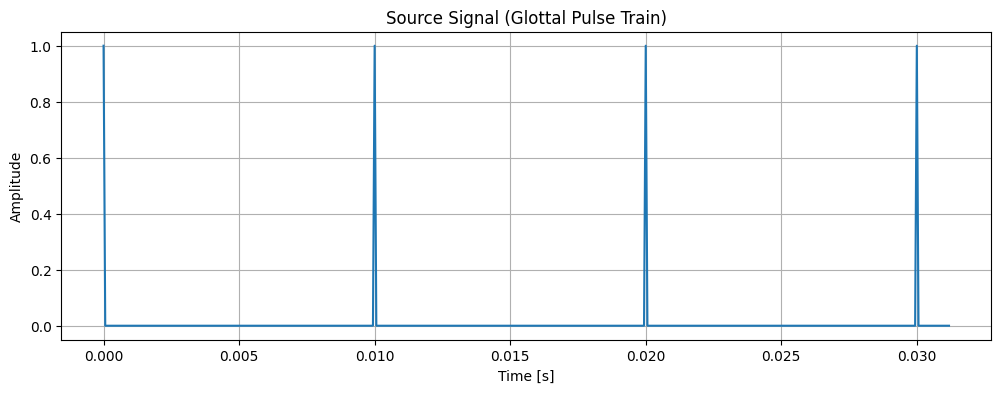

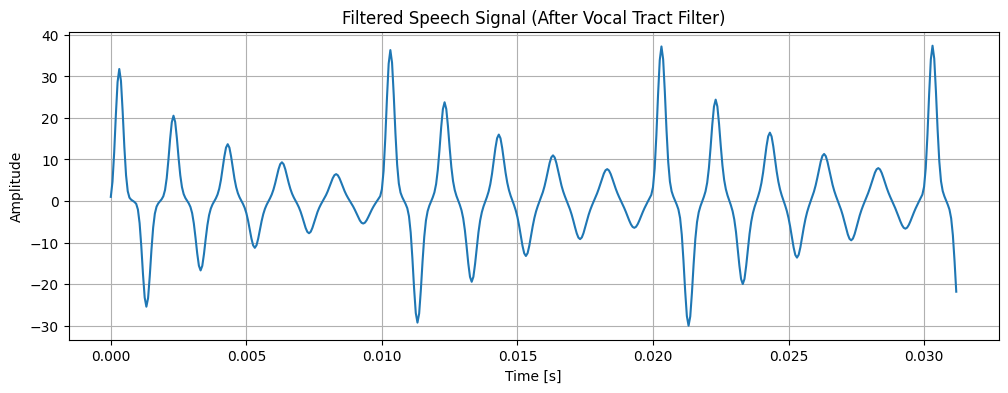

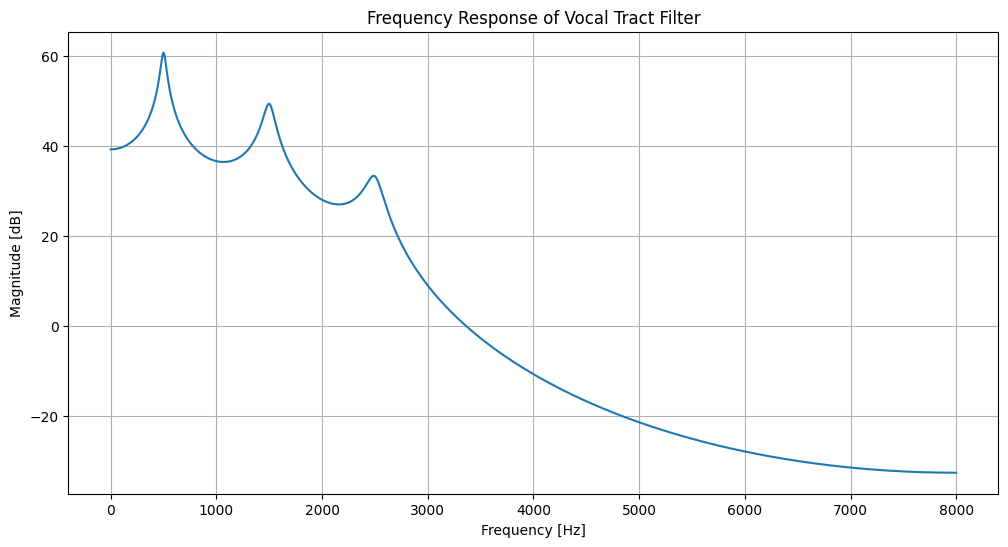

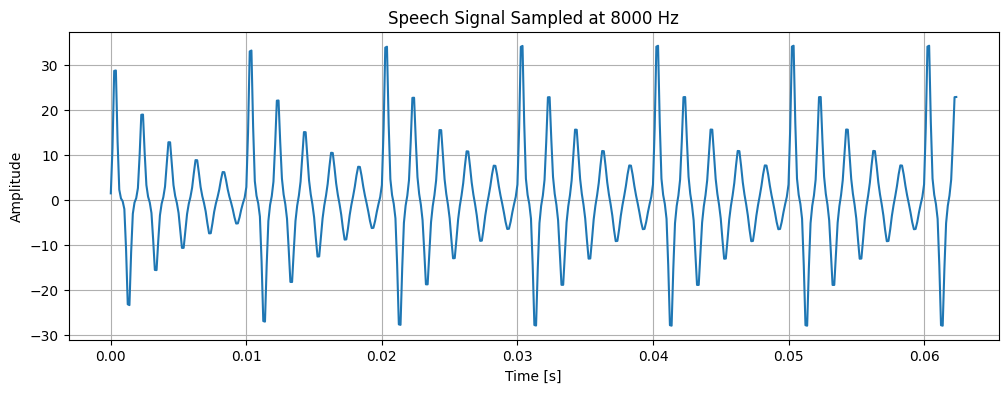

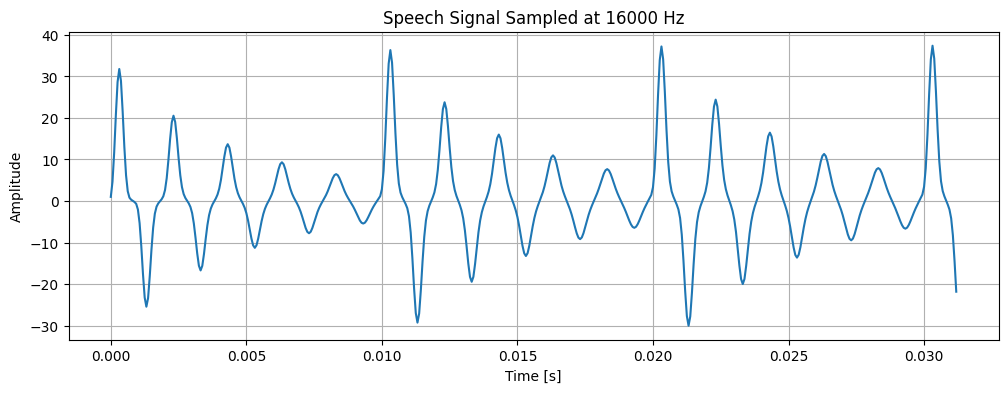

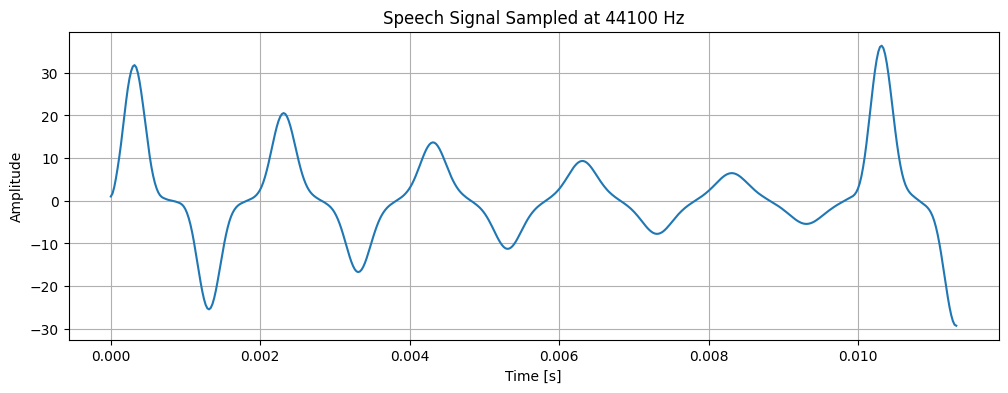

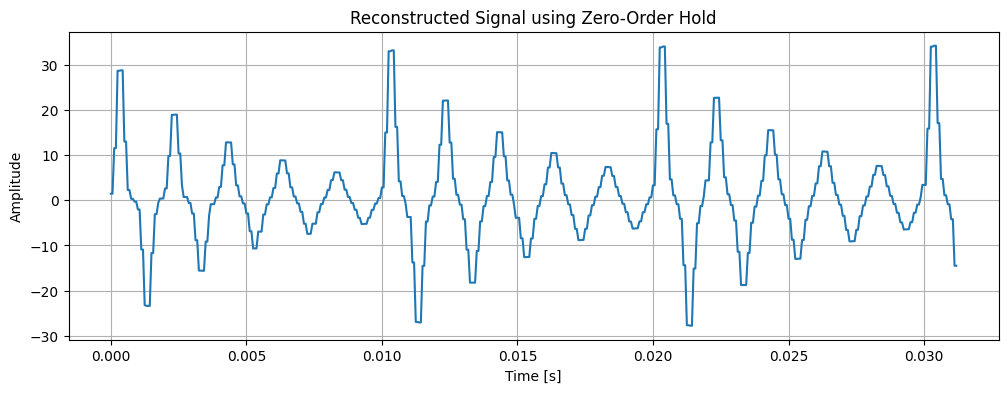

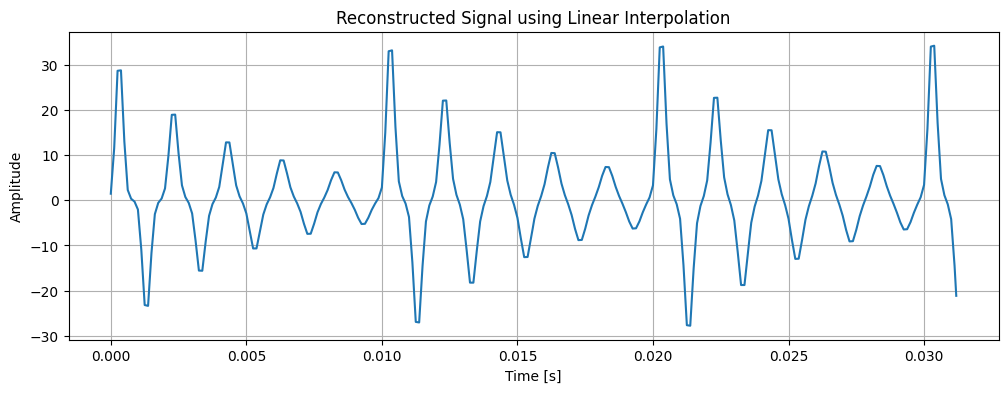

MSE between original and reconstructed signal using Zero-Order Hold: 4.2093133409271415
MSE between original and reconstructed signal using Linear Interpolation: 0.2216517239665938


In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import lfilter, resample, freqz
from scipy.interpolate import interp1d

def generate_glottal_pulse_train(f0, duration, fs):

    t = np.linspace(0, duration, int(fs * duration), endpoint=False)
    period_samples = int(fs / f0)
    glottal_pulse_train = np.zeros_like(t)
    glottal_pulse_train[::period_samples] = 1.0
    return t, glottal_pulse_train

def vocal_tract_filter(formant_freqs, bandwidths, fs):

    a = np.array([1.0])
    for f, bw in zip(formant_freqs, bandwidths):
        r = np.exp(-np.pi * bw / fs)
        theta = 2 * np.pi * f / fs
        p = [1, -2 * r * np.cos(theta), r ** 2]
        a = np.convolve(a, p)
    return a

fs = 16000
duration = 1.0
f0 = 100

t, source_signal = generate_glottal_pulse_train(f0, duration, fs)

formant_freqs = [500, 1500, 2500]
bandwidths = [50, 100, 150]

a = vocal_tract_filter(formant_freqs, bandwidths, fs)
b = [1.0]

filtered_signal = lfilter(b, a, source_signal)


plt.figure(figsize=(12, 4))
plt.plot(t[:500], source_signal[:500])
plt.title('Source Signal (Glottal Pulse Train)')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 4))
plt.plot(t[:500], filtered_signal[:500])
plt.title('Filtered Speech Signal (After Vocal Tract Filter)')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

w, h = freqz(b, a, worN=8000, fs=fs)
plt.figure(figsize=(12, 6))
plt.plot(w, 20 * np.log10(abs(h)))
plt.title('Frequency Response of Vocal Tract Filter')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude [dB]')
plt.grid(True)
plt.show()


sampling_rates = [8000, 16000, 44100]

resampled_signals = {}

for sr in sampling_rates:
    num_samples = int(len(filtered_signal) * sr / fs)
    resampled_signal = resample(filtered_signal, num_samples)
    resampled_signals[sr] = resampled_signal
    t_resampled = np.linspace(0, duration, num_samples, endpoint=False)
    plt.figure(figsize=(12, 4))
    plt.plot(t_resampled[:500], resampled_signal[:500])
    plt.title(f'Speech Signal Sampled at {sr} Hz')
    plt.xlabel('Time [s]')
    plt.ylabel('Amplitude')
    plt.grid(True)
    plt.show()


low_rate = 8000
signal_low = resampled_signals[low_rate]
t_low = np.linspace(0, duration, len(signal_low), endpoint=False)

t_original = np.linspace(0, duration, int(fs * duration), endpoint=False)

zero_order_interp = interp1d(t_low, signal_low, kind='nearest', fill_value="extrapolate")
reconstructed_zero_order = zero_order_interp(t_original)

linear_interp = interp1d(t_low, signal_low, kind='linear', fill_value="extrapolate")
reconstructed_linear = linear_interp(t_original)

plt.figure(figsize=(12, 4))
plt.plot(t_original[:500], reconstructed_zero_order[:500])
plt.title('Reconstructed Signal using Zero-Order Hold')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 4))
plt.plot(t_original[:500], reconstructed_linear[:500])
plt.title('Reconstructed Signal using Linear Interpolation')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()


def compute_mse(original_signal, reconstructed_signal):
    mse = np.mean((original_signal - reconstructed_signal) ** 2)
    return mse

mse_zero_order = compute_mse(filtered_signal, reconstructed_zero_order)
mse_linear = compute_mse(filtered_signal, reconstructed_linear)

print(f"MSE between original and reconstructed signal using Zero-Order Hold: {mse_zero_order}")
print(f"MSE between original and reconstructed signal using Linear Interpolation: {mse_linear}")


 1. Source-Filter Model Creation:
The source-filter model in speech processing separates the speech production process into two components: the source and the filter. The source generates the raw sound signal, which is either a periodic waveform (for voiced speech) or noise (for unvoiced speech). The filter represents the vocal tract's resonances (formants), shaping the source signal into recognizable speech. The source and filter are modeled separately, and the combination generates natural speech sounds. The frequency response graph shows peaks corresponding to formants, essential for synthesizing speech accurately. Modeling these components allows for controlled speech synthesis and signal processing tasks.

 2. Effect of Sampling Rates:
Sampling rates critically affect the quality of signal representation and reconstruction. According to the Nyquist-Shannon theorem, the sampling rate must be at least twice the highest frequency component of the signal to avoid aliasing, which leads to distortion. In speech processing, common sampling rates are 8 kHz for basic speech and 16 kHz or higher for better quality and intelligibility. Lower sampling rates fail to capture important high-frequency details, resulting in a loss of clarity. Proper sampling ensures the signal retains its essential characteristics, particularly the formants and other speech cues crucial for intelligibility.

 3. Signal Reconstruction:
Signal reconstruction involves converting a discretely sampled signal back into a continuous one. Linear interpolation, as shown in the graph, estimates values between sampled points using straight lines, offering a simple but effective way to approximate the original signal. While sufficient for moderately sampled signals, linear interpolation can cause inaccuracies for signals with high-frequency components. More sophisticated methods, like sinc interpolation, provide better accuracy by accounting for the band-limited nature of the signal. Proper reconstruction is essential for preserving the signal’s fidelity, ensuring smooth and natural transitions between sampled points, especially in applications like speech synthesis and audio processing.